In [1]:
# This cell imports all necessary libraries for this code
import xarray as xr # library for loading netcdf files
import matplotlib.pyplot as plt # library for plotting 
import numpy as np # libary for working with arrays
import cartopy.crs as ccrs # library for plotting on maps
import matplotlib.ticker as mticker # library for putting axes labels
import math # math library

In [2]:
# This cell defines which file to read

# data that you want to load 
filename = 'era5.33N-48N.162W-135W.2006121400.nc'
# The first thing you want to do is to check what variables are stored in what formats. There are multiple ways to do so.
# method 1) go to terminal and type "ncdump -h filename" where the filename is the actual name of the file that you want to check.
# This will output information about store variables and attributes
# method 2) Check the file here using "xr.open_dataset(filename)".
# When you run this cell, the line below will output information about the data file
datafile = xr.open_dataset(filename)

In [3]:
# This cell loads dimensions of the data
lat = datafile.lat.data # latitude (degress north)
lon = datafile.lon.data # longitude (degrees east)
lev = datafile.lev.data # pressure level (hPa)
time = datafile.time.data # time
print(time)

['2006-12-14T00:00:00.000000000']


In [5]:
# Load surface zonal wind
usfc = datafile.usfc.data[0,:,:] # surface zonal wind (m/s) with dimension lat x lon

In [6]:
# define some constants
a = 6.37*10**6 # mean radius of the earth (meters)

Text(0.5, 1.0, 'b) Zonal Gradient of Zonal Wind at the selected latitude')

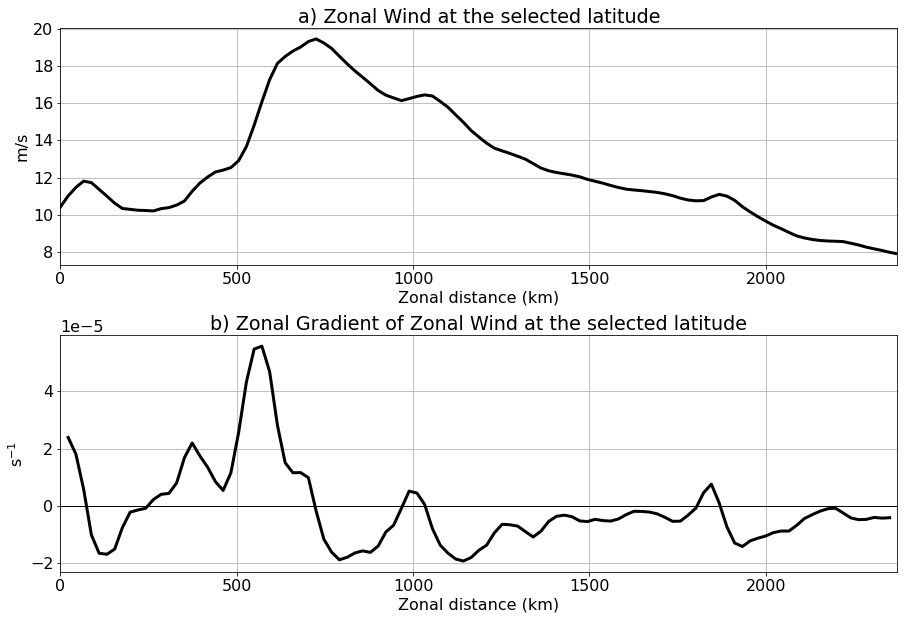

In [10]:
# Calculate zonal and meridional gradients of surface pressure using 3-point centered difference method
# du/dx(x=x2) = [u(x=x3)-u(x=x1)]/(x3-x1)
# using the centered difference method, we cannot calculate gradients at the outer edges of the data (unless the data is period in space)

# for illustration purposes, I will pick one latitude or longitude to show gradients
nlat = 41 # a randomly selected point

# convert degrees in longitude to zonal distance in meters at one selected latitude
u_lat0 = usfc[nlat,:] # pressure at the selected latitude
x_lat0 = (lon-lon[0])*2*(math.pi)*a*math.cos(lat[nlat]*math.pi/180)/360 # zonal distance (meters)

# calculate zonal gradient of surface pressure
dudx = np.zeros(len(lon))*np.nan
dudx[1:-1]=(u_lat0[2:]-u_lat0[0:-2])/(x_lat0[2:]-x_lat0[0:-2])

# figure to check if the calculated gradient makes sense
fig = plt.figure(figsize=(15,10)) # create a figure
plt.rcParams.update({'font.size':16}) # change the font size
plt.subplots_adjust(hspace=0.3)

# plot zonal profile of surface pressure
ax1 = plt.subplot(211)
plot1 = ax1.plot(x_lat0*(10**-3),u_lat0,color='k',linewidth=3)
ax1.set_xlim(x_lat0[0]*(10**-3),x_lat0[-1]*(10**-3))
ax1.set_xlabel('Zonal distance (km)')
ax1.set_ylabel('m/s')
plt.grid(True)
ax1.set_title('a) Zonal Wind at the selected latitude') 

# plot zonal gradient of the surface pressure
ax2 = plt.subplot(212)
plot2 = ax2.plot(x_lat0*(10**-3),dudx,color='k',linewidth=3)
plot2 = ax2.plot(x_lat0*(10**-3),np.zeros(len(x_lat0)),color='k',linewidth=1)
ax2.set_xlim(x_lat0[0]*(10**-3),x_lat0[-1]*(10**-3))
ax2.set_xlabel('Zonal distance (km)')
ax2.set_ylabel('s$^{-1}$')
plt.grid(True)
ax2.set_title('b) Zonal Gradient of Zonal Wind at the selected latitude') 


Text(0.5, 1.0, 'b) Meridional Gradient of Zonal Wind at the selected longitude')

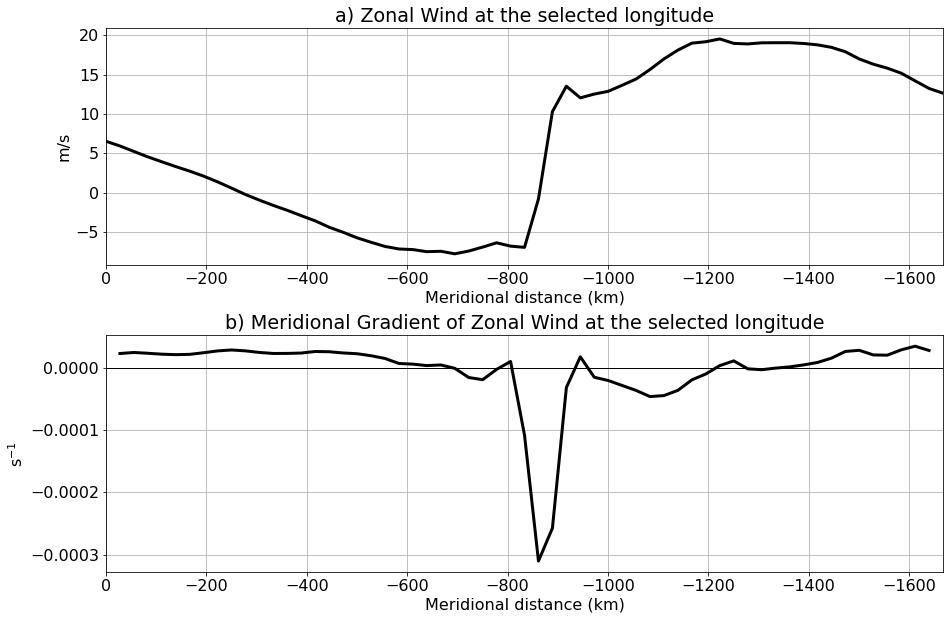

In [11]:
# Similarly, we can find meridional gradients

# convert degrees in latitude to meridional distance in meters at one selected longitude
# for illustration purposes, I will pick one latitude or longitude to show gradients
nlon = 37 # a randomly selected point

# convert degrees in longitude to zonal distance in meters at one selected latitude
u_lon0 = usfc[:,nlon] # pressure at the selected longitude
y_lon0 = (lat-lat[0])*2*(math.pi)*a/360 # meridional distance (meters)

# calculate meridional gradient of surface pressure
dudy = np.zeros(len(lat))*np.nan
dudy[1:-1]=(u_lon0[2:]-u_lon0[0:-2])/(y_lon0[2:]-y_lon0[0:-2])

# figure to check if the calculated gradient makes sense
fig = plt.figure(figsize=(15,10)) # create a figure
plt.rcParams.update({'font.size':16}) # change the font size
plt.subplots_adjust(hspace=0.3)

# plot zonal profile of surface pressure
ax1 = plt.subplot(211)
plot1 = ax1.plot(y_lon0*(10**-3),u_lon0,color='k',linewidth=3)
ax1.set_xlim(y_lon0[0]*(10**-3),y_lon0[-1]*(10**-3))
ax1.set_xlabel('Meridional distance (km)')
ax1.set_ylabel('m/s')
plt.grid(True)
ax1.set_title('a) Zonal Wind at the selected longitude') 

# plot zonal gradient of the surface pressure
ax2 = plt.subplot(212)
plot2 = ax2.plot(y_lon0*(10**-3),dudy,color='k',linewidth=3)
plot2 = ax2.plot(y_lon0*(10**-3),np.zeros(len(y_lon0)),color='k',linewidth=1)
ax2.set_xlim(y_lon0[0]*(10**-3),y_lon0[-1]*(10**-3))
ax2.set_xlabel('Meridional distance (km)')
ax2.set_ylabel('s$^{-1}$')
plt.grid(True)
ax2.set_title('b) Meridional Gradient of Zonal Wind at the selected longitude') 
